In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/obesity/obesity.csv')

In [3]:
# convert object values into numeric ones
gender_map = {'Female': 0, 'Male': 1}
FHWO_map = {'no': 0, 'yes': 1}
FAVC_map = {'no': 0, 'yes': 1}
CAEC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
SMOKE_map = {'no': 0, 'yes': 1}
SCC_map = {'no': 0, 'yes': 1}
CALC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
MTRANS_map = {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation': 4}
NObeyesdad_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4,'Obesity_Type_II': 5,'Obesity_Type_III': 6}

data['Gender'] = data['Gender'].map(gender_map)
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(FHWO_map)
data['FAVC'] = data['FAVC'].map(FAVC_map)
data['CAEC'] = data['CAEC'].map(CAEC_map)
data['SMOKE'] = data['SMOKE'].map(SMOKE_map)
data['SCC'] = data['SCC'].map(SCC_map)
data['CALC'] = data['CALC'].map(CALC_map)
data['MTRANS'] = data['MTRANS'].map(MTRANS_map)
data['NObeyesdad'] = data['NObeyesdad'].map(NObeyesdad_map)

In [5]:
# check the data after changes
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,4,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,4,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,4,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,4,3


In [4]:
### Separate the features and target variables
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Task 1: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Cross-validation with 10 folds
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(scores)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

print("\n------------------------\n")

# Accuracy
accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, knn_pred, average='macro')
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, knn_pred, average='macro')
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, knn_pred, average='macro')
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:")
print(cm)

Cross-Validation Scores:
[0.81132075 0.8436019  0.8957346  0.83886256 0.87677725 0.89099526
 0.83412322 0.90995261 0.92890995 0.88625592]
Mean Accuracy: 0.87
Standard Deviation: 0.04

------------------------

Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-Score: 0.87
Confusion Matrix:
[[56  0  0  0  0  0  0]
 [13 29 13  4  3  0  0]
 [ 0  4 50  2  0  0  0]
 [ 0  0  2 43  5  0  0]
 [ 0  0  0  0 75  2  1]
 [ 0  0  0  0  1 56  1]
 [ 0  0  0  0  0  0 63]]


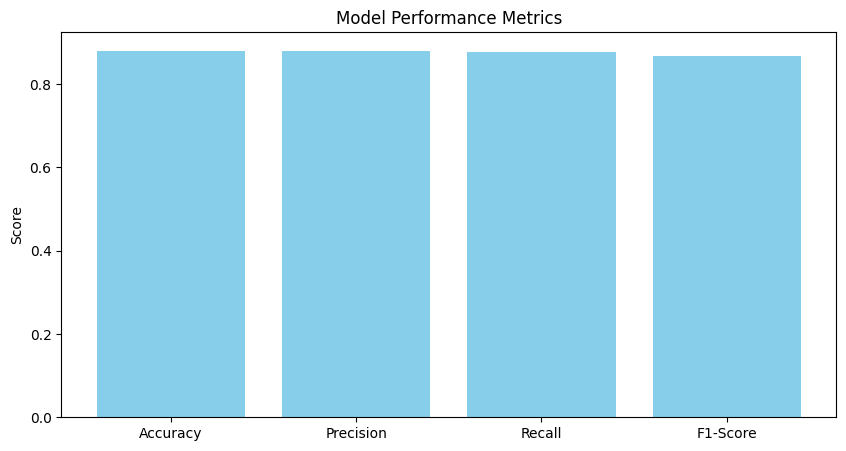

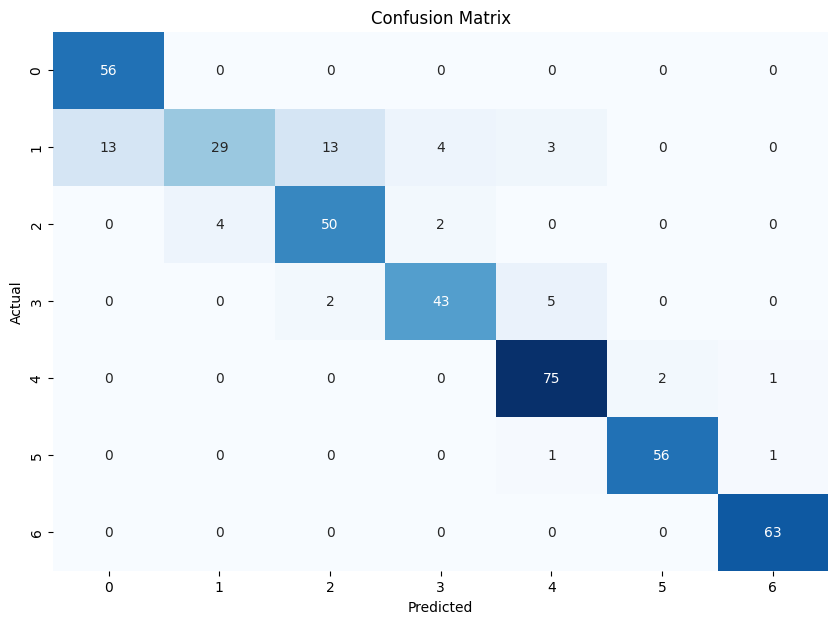

In [5]:
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

# Plotting metrics
plt.figure(figsize=(10, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
##### from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Create a pipeline with PCA and KNN
pca = PCA(n_components=5)
knn_pca = make_pipeline(pca, KNeighborsClassifier(n_neighbors=5))

# Fit the pipeline on the training data
knn_pca.fit(X_train, y_train)

# Make predictions on the test data
knn_pca_pred = knn_pca.predict(X_test)

# Evaluate the performance metrics
pca_accuracy = accuracy_score(y_test, knn_pca_pred)
pca_precision = precision_score(y_test, knn_pca_pred, average='macro')
pca_recall = recall_score(y_test, knn_pca_pred, average='macro')
pca_f1 = f1_score(y_test, knn_pca_pred, average='macro')

# Print the performance metrics
print("PCA Performance Metrics:")
print(f"Accuracy: {pca_accuracy:.2f}")
print(f"Precision: {pca_precision:.2f}")
print(f"Recall: {pca_recall:.2f}")
print(f"F1-Score: {pca_f1:.2f}")

PCA Performance Metrics:
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-Score: 0.83



Dropped Features Performance Metrics:
Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1-Score: 0.84

Confusion Matrix (Dropped Features):
[[54  2  0  0  0  0  0]
 [15 26 15  3  3  0  0]
 [ 0  5 49  2  0  0  0]
 [ 0  2  1 41  5  1  0]
 [ 0  0  0  1 74  2  1]
 [ 0  0  0  0  2 53  3]
 [ 0  0  0  0  0  1 62]]


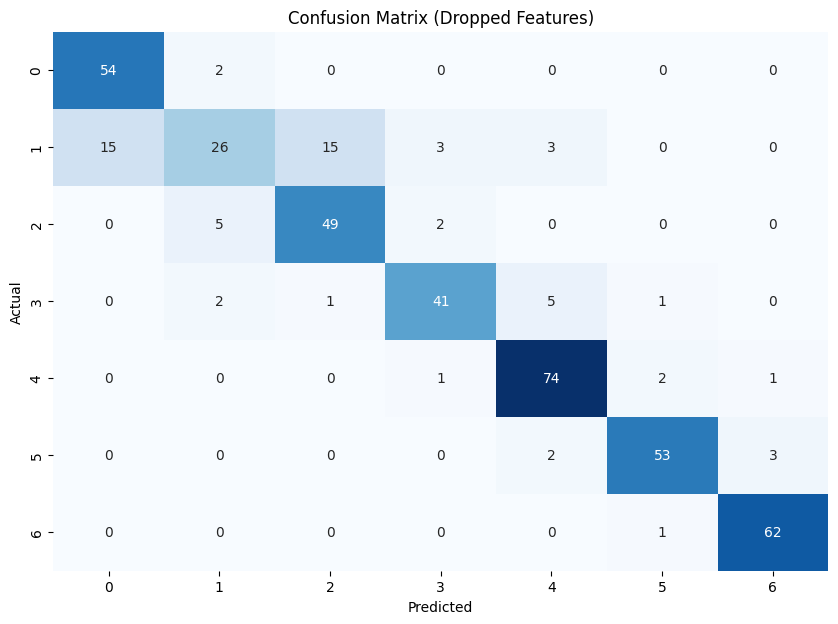

In [7]:
features_to_drop = ['Gender', 'NCP', 'SMOKE']
X_dropped = X.drop(features_to_drop, axis=1)

# Split the data into training and testing sets
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y, test_size=0.2, random_state=42)

# Classification Task 1: K-Nearest Neighbors (KNN) with dropped features
knn_dropped = KNeighborsClassifier(n_neighbors=5)
knn_dropped.fit(X_train_dropped, y_train_dropped)
knn_dropped_pred = knn_dropped.predict(X_test_dropped)

# Evaluate the performance metrics
dropped_accuracy = accuracy_score(y_test_dropped, knn_dropped_pred)
dropped_precision = precision_score(y_test_dropped, knn_dropped_pred, average='macro')
dropped_recall = recall_score(y_test_dropped, knn_dropped_pred, average='macro')
dropped_f1 = f1_score(y_test_dropped, knn_dropped_pred, average='macro')

# Print the performance metrics
print("\nDropped Features Performance Metrics:")
print(f"Accuracy: {dropped_accuracy:.2f}")
print(f"Precision: {dropped_precision:.2f}")
print(f"Recall: {dropped_recall:.2f}")
print(f"F1-Score: {dropped_f1:.2f}")

# Calculate the confusion matrix
cm_dropped = confusion_matrix(y_test_dropped, knn_dropped_pred)
print("\nConfusion Matrix (Dropped Features):")
print(cm_dropped)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dropped, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Dropped Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()